In [73]:
from splinter import Browser
from bs4 import BeautifulSoup as soup
import re 
import pandas as pd 
import time  
import matplotlib.pyplot as plt

In [74]:
cd 'D:\portafolio\Web_scraping_Facebook_departamentos_alquiler_Lima'

[WinError 123] El nombre de archivo, el nombre de directorio o la sintaxis de la etiqueta del volumen no son correctos: "'D:\\portafolio\\Web_scraping_Facebook_departamentos_alquiler_Lima'"
d:\portafolio\Web_scraping_Facebook_departamentos_alquiler_Lima


In [75]:
browser=Browser('chrome')
#Url básico
base_url= "https://www.facebook.com/marketplace/lima/search?"
#Definimos los parámetros que nos interesan
min_price=400
max_price=3000
days_listed=30
query="alquiler"

In [76]:
#Visitamos la página
url=f"{base_url}minPrice={min_price}&maxPrice={max_price}&daysSinceListed={days_listed}&query={query}%20departamentos&exact=false"
browser.visit(url)

In [77]:
#Definimos el numero de scolls para cargar más resultados 
scroll_count=20
scroll_delay=2

for _ in range(scroll_count):
    browser.execute_script('window.scrollTo(0, document.body.scrollHeight);')

    time.sleep(scroll_delay)

In [78]:
#Parse HTML
html=browser.html 
#Creamos un objeto BeautifulSoup desde el HTML scrapeado
market_soup=soup(html, 'html.parser')
#revisamos si el HTML fue scrapeado de forma correcta 
market_soup

<html class="_9dls __fb-light-mode" dir="ltr" id="facebook" lang="es"><head><link data-badged-icon="https://static.xx.fbcdn.net/rsrc.php/yD/r/UJj0tgk-RrT.ico" data-default-icon="https://static.xx.fbcdn.net/rsrc.php/yT/r/aGT3gskzWBf.ico" href="https://static.xx.fbcdn.net/rsrc.php/yT/r/aGT3gskzWBf.ico" rel="shortcut icon"/><meta content="width=device-width,initial-scale=1,maximum-scale=2,shrink-to-fit=no" name="viewport"/><link crossorigin="use-credentials" href="/data/manifest/" id="MANIFEST_LINK" rel="manifest"/><meta content="light" name="color-scheme"/><meta content="#FFFFFF" name="theme-color"/><style nonce="">:root{--fds-black:#000000;--fds-black-alpha-05:rgba(0, 0, 0, 0.05);--fds-black-alpha-10:rgba(0, 0, 0, 0.1);--fds-black-alpha-15:rgba(0, 0, 0, 0.15);--fds-black-alpha-20:rgba(0, 0, 0, 0.2);--fds-black-alpha-30:rgba(0, 0, 0, 0.3);--fds-black-alpha-40:rgba(0, 0, 0, 0.4);--fds-black-alpha-50:rgba(0, 0, 0, 0.5);--fds-black-alpha-60:rgba(0, 0, 0, 0.6);--fds-black-alpha-80:rgba(0, 0,

In [79]:
#Finalizar la sesión de navegación automatizada
browser.quit()

In [80]:
#Extraemos toda la información necesaria y las colocamos en listas 
#Título 
titles_div=market_soup.find_all('span', class_='x1lliihq x6ikm8r x10wlt62 x1n2onr6')
titles_list= [title.text.strip() for title in titles_div]
#Precio
precio_div=market_soup.find_all('span', class_='x193iq5w xeuugli x13faqbe x1vvkbs x1xmvt09 x1lliihq x1s928wv xhkezso x1gmr53x x1cpjm7i x1fgarty x1943h6x xudqn12 x676frb x1lkfr7t x1lbecb7 x1s688f xzsf02u')
precio_list= [precio.text.strip() for precio in precio_div]
#Lugar
place_div=market_soup.find_all('span', class_='x1lliihq x6ikm8r x10wlt62 x1n2onr6 xlyipyv xuxw1ft x1j85h84')
place_list= [place.text.strip() for place in place_div]
#URL
urls_div=market_soup.find_all('a', class_='x1i10hfl xjbqb8w x6umtig x1b1mbwd xaqea5y xav7gou x9f619 x1ypdohk xt0psk2 xe8uvvx xdj266r x11i5rnm xat24cr x1mh8g0r xexx8yu x4uap5 x18d9i69 xkhd6sd x16tdsg8 x1hl2dhg xggy1nq x1a2a7pz x1heor9g x1lku1pv')
urls_list=[url.get('href') for url in urls_div]

In [81]:
urls_list

['/marketplace/item/661097059344441/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD',
 '/marketplace/item/1669418246870492/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD',
 '/marketplace/item/6787179298024742/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD',
 '/marketplace/item/1732663153882283/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD',
 '/marketplace/item/1287276458432780/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD',
 '/marketplace/item/6788805147902868/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD',
 '/marketplace/item/346010674757493/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD',
 '/marketplace/item/702030878508880/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD',
 '/marketplace/item/1494419984747751/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD',
 '/marketplace/item/26369113464

In [82]:
#Agregamos todos lols valores a una lista de diccionarios 
departamentos_alquiler=[]

for i, item in enumerate(place_list):
    dep_dict={}
    dep_dict['Publicación']=titles_list[i]
    #Separo el distrito de la provincia
    place_split=place_list[i].split(',')
    dep_dict['Provincia']=place_split[1]
    dep_dict['Distrito']=place_split[0]
    #Quito el (S/)
    dep_dict['Precio']=int(re.sub(r'[^\d.]', '', precio_list[i]))
    #Agrego el URL 
    dep_dict['URL']=urls_list[i]
    departamentos_alquiler.append(dep_dict)

In [83]:
departamentos_alquiler=pd.DataFrame(departamentos_alquiler)

In [84]:
print(departamentos_alquiler.shape)
departamentos_alquiler.head()


(504, 5)


,Publicación,Provincia,Distrito,Precio,URL
0,Alquiler habitación con baño y cocina 4to piso...,Lima,Breña,550,/marketplace/item/661097059344441/?ref=search&...
1,Alquiler de Departamento Zona Centrica,Lima,Lima,1600,/marketplace/item/1669418246870492/?ref=search...
2,Alquiler departamento La calera Surquillo,Lima,Surquillo,1900,/marketplace/item/6787179298024742/?ref=search...
3,"Alquiler Mini departamento en Pueblo Libre, lí...",Lima,Pueblo Libre,1200,/marketplace/item/1732663153882283/?ref=search...
4,!!!...ALQUILER DEPARTAMENTO EN EL RÍMAC...!!!,Lima,Rimac,999,/marketplace/item/1287276458432780/?ref=search...


In [85]:
departamentos_alquiler['URL']='https://www.facebook.com' + departamentos_alquiler['URL'] 

In [86]:
departamentos_alquiler.head()

,Publicación,Provincia,Distrito,Precio,URL
0,Alquiler habitación con baño y cocina 4to piso...,Lima,Breña,550,https://www.facebook.com/marketplace/item/6610...
1,Alquiler de Departamento Zona Centrica,Lima,Lima,1600,https://www.facebook.com/marketplace/item/1669...
2,Alquiler departamento La calera Surquillo,Lima,Surquillo,1900,https://www.facebook.com/marketplace/item/6787...
3,"Alquiler Mini departamento en Pueblo Libre, lí...",Lima,Pueblo Libre,1200,https://www.facebook.com/marketplace/item/1732...
4,!!!...ALQUILER DEPARTAMENTO EN EL RÍMAC...!!!,Lima,Rimac,999,https://www.facebook.com/marketplace/item/1287...


In [87]:
prices=departamentos_alquiler.groupby('Distrito')['Precio'].mean().sort_values()

In [88]:
prices

Distrito
Barranco                    700.000000
Villa María del Triunfo     712.500000
Carabayllo                  740.000000
Rimac                       807.000000
San Juan de Lurigancho      827.500000
Comas                       847.619048
La Perla                    883.333333
Callao                      913.157895
Villa El Salvador           941.818182
San Martín de Porres        953.125000
Bellavista                  978.571429
Santa Anita                1010.714286
Ate                        1043.750000
Ventanilla                 1050.000000
Los Olivos                 1052.187500
Puente Piedra              1062.500000
San Juan de Miraflores     1068.181818
Lurigancho                 1100.000000
Miraflores                 1110.000000
La Victoria                1139.196429
San Isidro                 1150.000000
Chorrillos                 1187.500000
San Luis                   1222.000000
Breña                      1258.333333
Santiago de Surco          1305.914894
San Miguel      

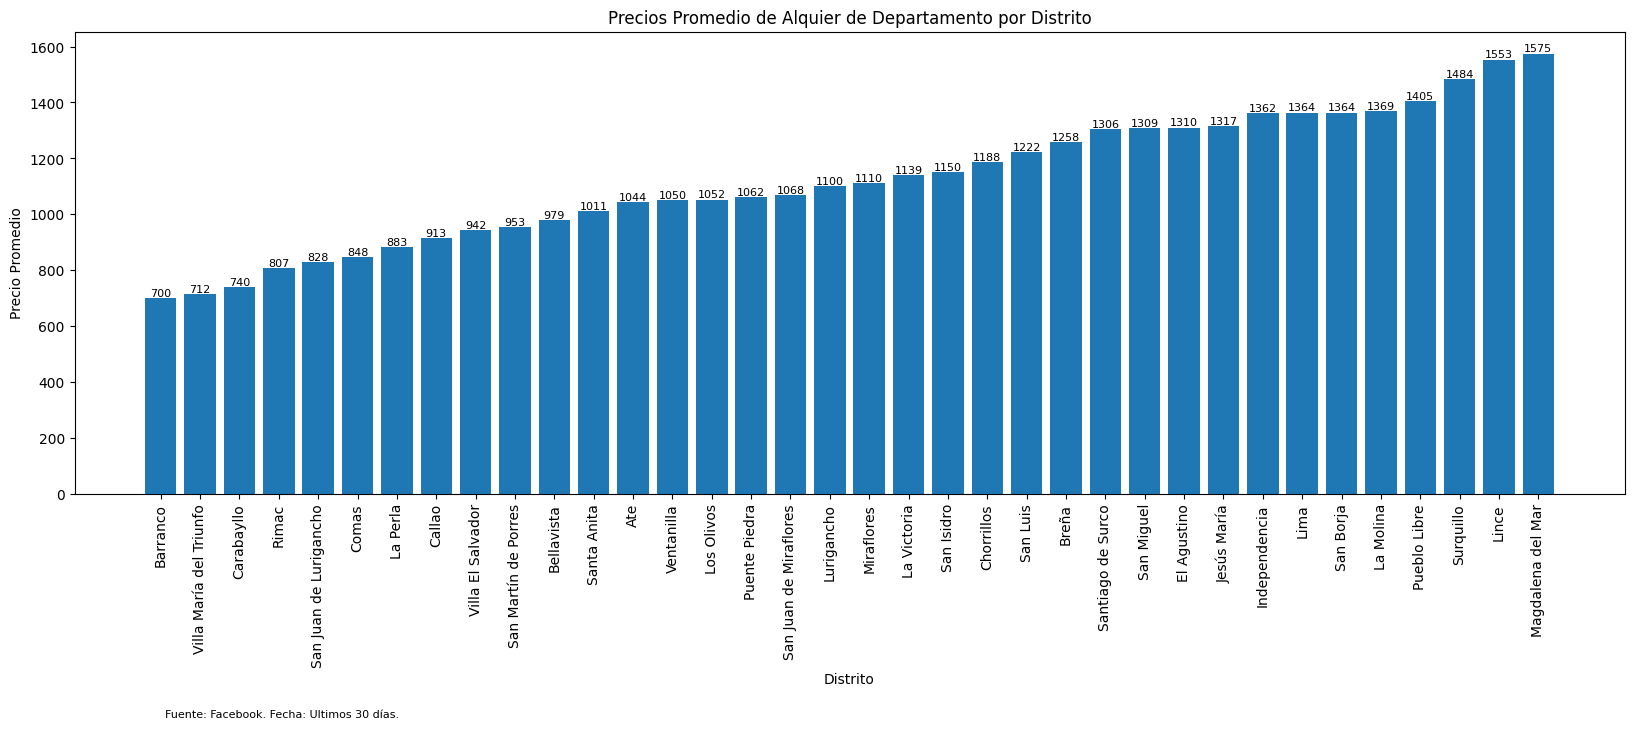

In [91]:

plt.figure(figsize=(20, 6))  # Ajusta el tamaño de la figura según tus preferencias
plt.bar(prices.index, prices.values)
# Agregar los valores encima de cada barra
for i, v in enumerate(prices.values):
    plt.text(i, v, f'{v:.0f}', ha='center', va='bottom', fontsize=8)
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x si son largas
plt.xlabel('Distrito')
plt.ylabel('Precio Promedio')
plt.title('Precios Promedio de Alquier de Departamento por Distrito')
plt.text(0.1, -800, 'Fuente: Facebook. Fecha: Ultimos 30 días.', fontsize=8, color='Black')
plt.savefig('outputs\graph_bar.png')
plt.show()

In [90]:
departamentos_alquiler.to_excel('outputs\departamentos_alquiler.xlsx',  index=False)